In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | sorland
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | kanye
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | ucluelet
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | newport
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | nome
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | mehamn
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | hearst
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | zheleznogorsk
Processing Record 23 of Set 1 | yulara
Processing Record 24 of

Processing Record 39 of Set 4 | kabare
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | bemidji
Processing Record 42 of Set 4 | yellowknife
Processing Record 43 of Set 4 | qaanaaq
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | ust-nera
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | satitoa
City not found. Skipping...
Processing Record 49 of Set 4 | teahupoo
Processing Record 50 of Set 4 | codrington
Processing Record 1 of Set 5 | vao
Processing Record 2 of Set 5 | troitskoye
Processing Record 3 of Set 5 | tazovskiy
Processing Record 4 of Set 5 | ascension
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | luocheng
Processing Record 7 of Set 5 | krasnyy kut
Processing Record 8 of Set 5 | ponta do sol
Processing Record 9 of Set 5 | moose factory
Processing Record 10 of Set 5 | gizo
Processing Record 11 of Set 5 | zhigansk
Pro

Processing Record 31 of Set 8 | warrington
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | gandorhun
Processing Record 34 of Set 8 | conceicao do araguaia
Processing Record 35 of Set 8 | cururupu
Processing Record 36 of Set 8 | tessalit
Processing Record 37 of Set 8 | aripuana
Processing Record 38 of Set 8 | moyale
Processing Record 39 of Set 8 | cabo san lucas
Processing Record 40 of Set 8 | rafaela
Processing Record 41 of Set 8 | cap malheureux
Processing Record 42 of Set 8 | yumen
Processing Record 43 of Set 8 | sovetskiy
Processing Record 44 of Set 8 | karlshamn
Processing Record 45 of Set 8 | antalaha
Processing Record 46 of Set 8 | keningau
Processing Record 47 of Set 8 | linxia
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | ust-kan
Processing Record 50 of Set 8 | te anau
Processing Record 1 of Set 9 | humaita
Processing Record 2 of Set 9 | mugango
Processing Record 3 of Set 9 | sur
Processing Record 4 of Set 9 | keflavik
Process

Processing Record 20 of Set 12 | ca mau
Processing Record 21 of Set 12 | waingapu
Processing Record 22 of Set 12 | talas
Processing Record 23 of Set 12 | gabu
Processing Record 24 of Set 12 | arawa
Processing Record 25 of Set 12 | dharur
Processing Record 26 of Set 12 | vuktyl
Processing Record 27 of Set 12 | dalbandin
Processing Record 28 of Set 12 | chagda
City not found. Skipping...
Processing Record 29 of Set 12 | ketchikan
Processing Record 30 of Set 12 | grande prairie
Processing Record 31 of Set 12 | dolinsk
Processing Record 32 of Set 12 | saint-denis
Processing Record 33 of Set 12 | kataysk
Processing Record 34 of Set 12 | montmagny
Processing Record 35 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 12 | leshukonskoye
Processing Record 37 of Set 12 | nuuk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,73.36,83,0,11.50,BR,2021-11-25 23:16:40
1,Ushuaia,-54.8000,-68.3000,42.46,70,40,23.02,AR,2021-11-25 23:17:57
2,Sorland,67.6670,12.6934,34.00,42,100,10.18,NO,2021-11-25 23:17:57
3,Barrow,71.2906,-156.7887,-9.38,77,20,16.11,US,2021-11-25 23:16:54
4,Kanye,-24.9667,25.3327,60.26,73,0,24.65,BW,2021-11-25 23:17:58
5,Rikitea,-23.1203,-134.9692,76.57,75,8,10.76,PF,2021-11-25 23:17:58
6,Albany,42.6001,-73.9662,41.27,70,100,1.95,US,2021-11-25 23:14:04
7,Naze,28.3667,129.4833,59.92,63,100,6.82,JP,2021-11-25 23:17:59
8,Ucluelet,48.9329,-125.5528,53.10,94,100,1.01,CA,2021-11-25 23:13:16
9,Vaini,-21.2000,-175.2000,87.96,79,75,6.91,TO,2021-11-25 23:18:00


In [21]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df =city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2021-11-25 23:16:40,-22.9661,-42.0278,73.36,83,0,11.50
1,Ushuaia,AR,2021-11-25 23:17:57,-54.8000,-68.3000,42.46,70,40,23.02
2,Sorland,NO,2021-11-25 23:17:57,67.6670,12.6934,34.00,42,100,10.18
3,Barrow,US,2021-11-25 23:16:54,71.2906,-156.7887,-9.38,77,20,16.11
4,Kanye,BW,2021-11-25 23:17:58,-24.9667,25.3327,60.26,73,0,24.65


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

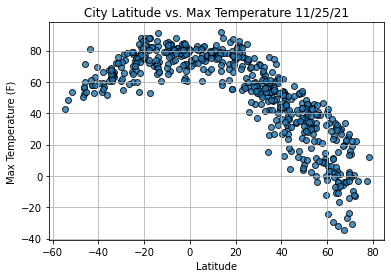

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

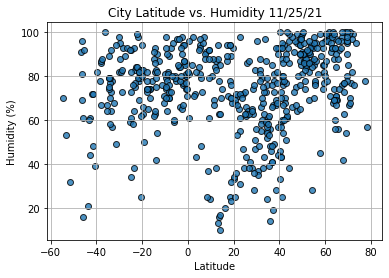

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

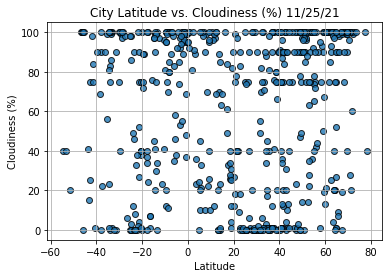

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

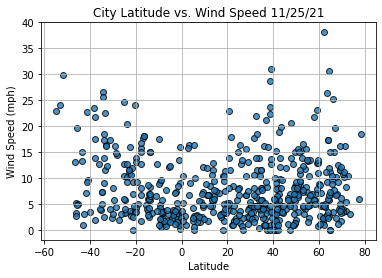

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  r Value: " + str(round(r_value,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-11-25 23:18:02
Lat                        -33.65
Lng                      115.3333
Max Temp                    63.09
Humidity                       64
Cloudiness                     86
Wind Speed                  11.61
Name: 13, dtype: object

In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Sorland,NO,2021-11-25 23:17:57,67.6670,12.6934,34.00,42,100,10.18
3,Barrow,US,2021-11-25 23:16:54,71.2906,-156.7887,-9.38,77,20,16.11
6,Albany,US,2021-11-25 23:14:04,42.6001,-73.9662,41.27,70,100,1.95
7,Naze,JP,2021-11-25 23:17:59,28.3667,129.4833,59.92,63,100,6.82
8,Ucluelet,CA,2021-11-25 23:13:16,48.9329,-125.5528,53.10,94,100,1.01


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

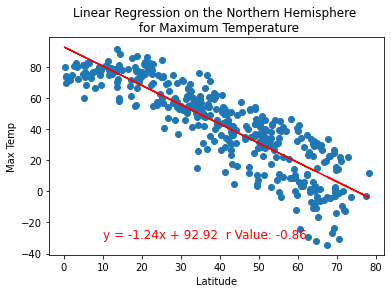

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-30))

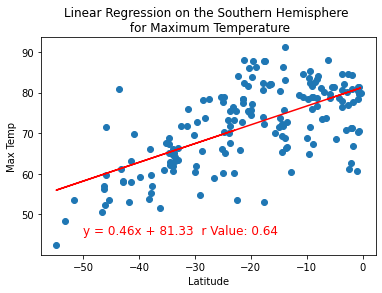

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,45))


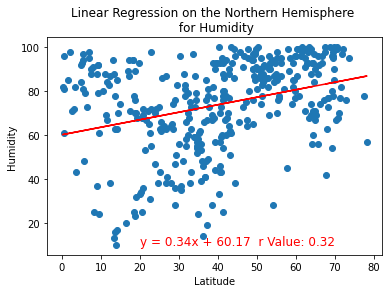

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Humidity', 'Humidity',(20,10))

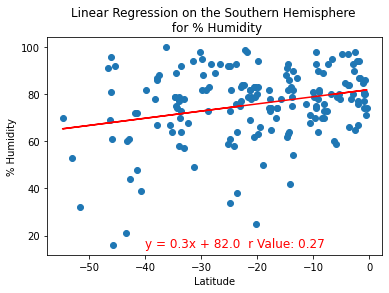

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-40,15))

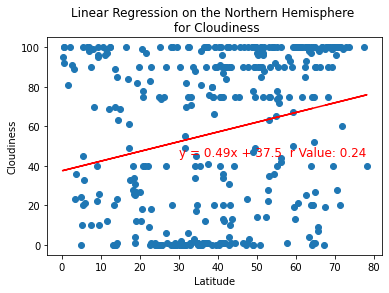

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(30,45))

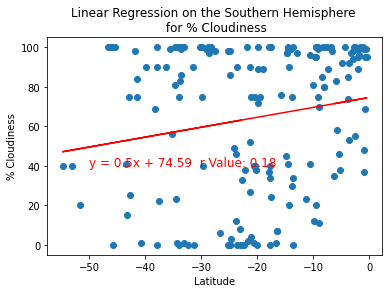

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,40))

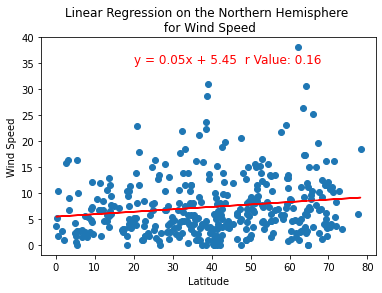

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,35))

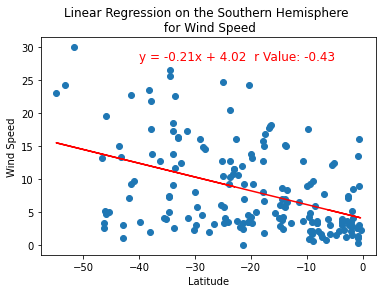

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-40,28))